In [1]:
# libraries and dataset imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

daily_df = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv') # df containing all daily activity data for each user
weight_log = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv') # records of users weight logs
sleep_log = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv') # records of users sleep logs

In [2]:
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
daily_df.shape

(940, 15)

In [4]:
# checking the datatype of each column

daily_df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

Dates should be in date format, so I will reformat them.

In [5]:
daily_df['ActivityDate'] = pd.to_datetime(daily_df['ActivityDate'])

daily_df.dtypes

Id                                   int64
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [6]:
users = daily_df['Id'].nunique()
days = daily_df['ActivityDate'].nunique()
min_date = daily_df['ActivityDate'].min().date()
max_date = daily_df['ActivityDate'].max().date()

print("There were", users, "users recorded for", days, "days from", min_date, "to", max_date)

There were 33 users recorded for 31 days from 2016-04-12 to 2016-05-12


In [7]:
every_day = daily_df['Id'].value_counts().loc[lambda x : x == 31].count()
missed_days = daily_df['Id'].value_counts().loc[lambda x : x < 31].count()
min_records = daily_df['Id'].value_counts().min()

print('Users with records for each day of the survey period:', every_day, '\nUsers who missed some days:', missed_days, '\nMinimum number of records:', daily_df['Id'].value_counts().min())

Users with records for each day of the survey period: 21 
Users who missed some days: 12 
Minimum number of records: 4


In [8]:
for col in daily_df.columns.values:
    if (daily_df.loc[daily_df[col].isnull() == True]).empty:
        pass
    else:
        print(col, ':', daily_df[col].isnull().sum(), 'Nulls')

There are no null values in the dataset.

In [9]:
daily_df.loc[daily_df['LoggedActivitiesDistance'] > 0]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
668,6775888955,2016-04-26,7091,5.27,5.27,1.959596,3.48,0.87,0.73,0.00,42,30,47,1321,2584
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096


In [10]:
daily_df['LoggedActivitiesDistance'].loc[daily_df['LoggedActivitiesDistance'] > 0].count()

32

In [11]:
daily_df.loc[daily_df['TotalDistance'] != (daily_df['TrackerDistance'] + daily_df['LoggedActivitiesDistance'])]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
668,6775888955,2016-04-26,7091,5.27,5.27,1.959596,3.48,0.87,0.73,0.00,42,30,47,1321,2584
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096


In [12]:
daily_df['LoggedActivitiesDistance'].loc[daily_df['TotalDistance'] != (daily_df['TrackerDistance'] + daily_df['LoggedActivitiesDistance'])].count()

32

In [13]:
daily_df.loc[daily_df['TotalDistance'] != (daily_df['TrackerDistance'])]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055


In [14]:
daily_df['TrackerDistance'].loc[daily_df['TotalDistance'] != (daily_df['TrackerDistance'])].count()

15

<Axes: >

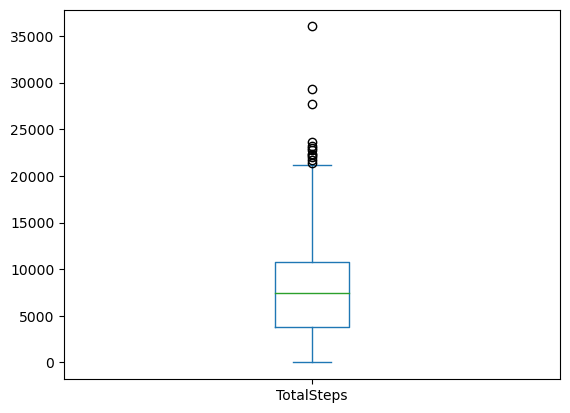

In [15]:
daily_df.plot(y = 'TotalSteps', kind = 'box')

In [16]:
daily_df.loc[daily_df['TotalSteps'] == daily_df['TotalSteps'].max()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
50,1624580081,2016-05-01,36019,28.030001,28.030001,0.0,21.92,4.19,1.91,0.02,186,63,171,1020,2690


In [17]:
daily_df.loc[daily_df['TotalDistance'] == daily_df['TotalDistance'].max()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
50,1624580081,2016-05-01,36019,28.030001,28.030001,0.0,21.92,4.19,1.91,0.02,186,63,171,1020,2690


Given the distance, it is not outrageous that that is their steps for that day.

<Axes: >

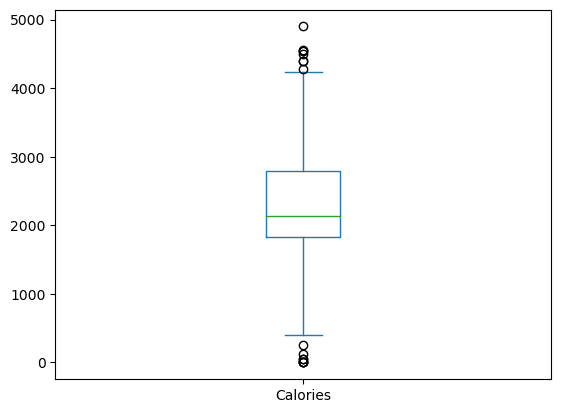

In [18]:
daily_df.plot(y = 'Calories', kind = 'box')

In [19]:
daily_df.loc[daily_df['Calories'] == daily_df['Calories'].max()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
606,6117666160,2016-04-21,19542,15.01,15.01,0.0,0.98,0.4,5.62,0.0,11,19,294,579,4900


A lot of calories but not too outrageous to be included.

In [20]:
daily_df.loc[daily_df['Calories'] == daily_df['Calories'].min()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
30,1503960366,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
653,6290855005,2016-05-10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
817,8253242879,2016-04-30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0
879,8583815059,2016-05-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,0


Clearly, these are times when the device was not worn for the whole day.

In [21]:
minute_cols = ['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']

for i in minute_cols:
    if daily_df.loc[daily_df[i] > 1440].empty:
        pass
    else:
        print(i, ':', (daily_df[i] > 1440).sum(), 'active minute records greater than 24hrs')

In [22]:
dist_cols = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']

for i in dist_cols:
    if daily_df.loc[daily_df[i] > daily_df['TotalDistance']].empty:
        pass
    else:
        print(i, ':', (daily_df[i] > daily_df['TotalDistance']).sum(), 'active distance records greater than total distance')

In [23]:
weight_log.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [24]:
weight_log.shape

(67, 8)

In [25]:
weight_log.dtypes

Id                  int64
Date               object
WeightKg          float64
WeightPounds      float64
Fat               float64
BMI               float64
IsManualReport       bool
LogId               int64
dtype: object

In [26]:
weight_log['Date'] = pd.to_datetime(weight_log['Date'])

weight_log.dtypes

Id                         int64
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
dtype: object

In [27]:
every_day = weight_log['Id'].value_counts().loc[lambda x : x == 31].count()
missed_days = weight_log['Id'].value_counts().loc[lambda x : x < 31].count()

print('Users with records for each day of the survey period:', every_day, '\nUsers with records for some of the days:', missed_days, '\nUsers who did not record their weight:', 31 - (every_day + missed_days))

Users with records for each day of the survey period: 0 
Users with records for some of the days: 8 
Users who did not record their weight: 23


In [28]:
for col in weight_log.columns.values:
    if (weight_log.loc[weight_log[col].isnull() == True]).empty:
        pass
    else:
        print(col, ':', weight_log[col].isnull().sum(), 'Nulls')

Fat : 65 Nulls


65 out of 67 records are null for this column. I will remove the Fat column.

In [29]:
weight_log = weight_log.drop('Fat', axis=1)

weight_log.head()

,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.599998,115.963147,22.650000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.599998,115.963147,22.650000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.500000,294.317120,47.540001,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.700001,125.002104,21.450001,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.299999,126.324875,21.690001,True,1463097599000


Wanted to check conversion between Kg to Lb but its a messy conversion. Unable to properly compare.

In [30]:
sleep_log.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [31]:
sleep_log.shape

(413, 5)

In [32]:
sleep_log.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [33]:
sleep_log['SleepDay'] = pd.to_datetime(sleep_log['SleepDay'])

sleep_log.dtypes

Id                             int64
SleepDay              datetime64[ns]
TotalSleepRecords              int64
TotalMinutesAsleep             int64
TotalTimeInBed                 int64
dtype: object

In [34]:
every_day = sleep_log['Id'].value_counts().loc[lambda x : x == 31].count()
missed_days = sleep_log['Id'].value_counts().loc[lambda x : x < 31].count()

print('Users with records for each day of the survey period:', every_day, '\nUsers with records for some of the days:', missed_days, '\nUsers who did not record their sleep:', 31 - (every_day + missed_days))

Users with records for each day of the survey period: 2 
Users with records for some of the days: 21 
Users who did not record their sleep: 8


In [35]:
for col in sleep_log.columns.values:
    if (sleep_log.loc[sleep_log[col].isnull() == True]).empty:
        pass
    else:
        print(col, ':', sleep_log[col].isnull().sum(), 'Nulls')

There are no null values in the dataset.

<Axes: >

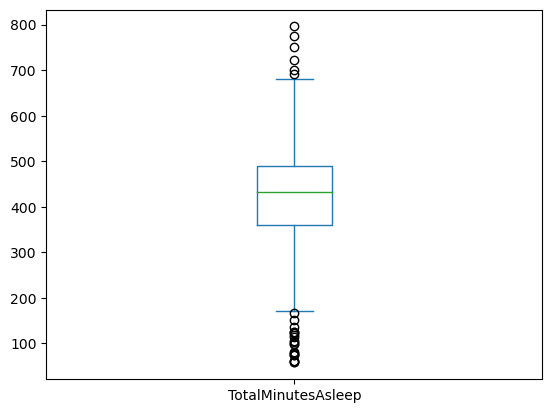

In [36]:
sleep_log.plot(y = 'TotalMinutesAsleep', kind = 'box')

In [37]:
sleep_log.loc[sleep_log['TotalMinutesAsleep'] == sleep_log['TotalMinutesAsleep'].max()]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
27,1644430081,2016-05-02,1,796,961


In [38]:
sleep_log.loc[sleep_log['TotalMinutesAsleep'] > sleep_log['TotalTimeInBed']]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed


# Study Data

Overall, activity trackers mainly motivated users to
monitor activity patterns (35.9%, n = 85), improve fitness
(27.4%, n = 65) and improve health (18.1%, n = 43)

The majority
of current users either strongly or somewhat agreed that
various features on their trackers were useful, including:
steps (95%), active minutes (76%), sleep (66%), heart rate
(63%), stairs climbed (58%), energy burned (57%). 

Fewer
agreed that the food intake feature was useful (36%).

The majority of current (89%) and former
(54%) users agreed that the real time monitoring was
useful, while slightly fewer current users (78%) and
former users (41%) agreed that long term monitoring
was useful.

The majority of current
(81.4%) and former (51.3%) users believed that they in-
corporated more physical activity into their day whilst
wearing their activity tracker. In contrast, only 40.2% of
current users and 13.5% of former users reported they
had improved their eating patterns as a results of using
their tracker, and even fewer reported they had changed
their sleeping pattern (24.1% of current users and 10.8%
of former users). 

Overall, 68.3% of current users and 70.2% of
former users reported an initial increase in their activity
levels. However, 9.5% of current users and 27.0% of
former users reported that this increase was transient,
and that their activity levels had subsequently declined
to baseline levels.

The majority of participants reported that they
did not use social features (65%) nor did they share their
activity data on social media platforms (77%). Amongst
those who did report using social features, the most
common platform for this was the trackers’ support soft-
ware (35%), and relatively few users reported sharing
their data to external social networking sites such as
Strava, Facebook or Instagram (1–5%). The prime motiv-
ation for using social features was reportedly “to compete with friends” (17%).

Table 3

Table 4

current users were more likely to be in a
relationship than former users.

 Overall, users were most likely to obtain
their activity trackers by purchasing it themselves
(56.58%) or receiving it as a gift from their family
(43.5%).

# Analysis

Compare active min levels across users

In [39]:
daily_df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [40]:
active_min = daily_df[['Id', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes']]

avg_active_min = active_min.groupby('Id').mean()

avg_active_min['exercise_min'] = avg_active_min['VeryActiveMinutes'] + avg_active_min['FairlyActiveMinutes']

In [41]:
daily_exercise_min = pd.DataFrame(data=(avg_active_min['exercise_min'].value_counts(bins=4, sort=False)))

daily_exercise_min.rename(columns={'exercise_min': 'User_Count'}, inplace=True)

daily_exercise_min['%_of_Total_Users'] = ((daily_exercise_min['User_Count']/daily_exercise_min['User_Count'].sum()) * 100).round()

daily_exercise_min

,User_Count,%_of_Total_Users
"(0.237, 29.558]",16,48.0
"(29.558, 58.761]",11,33.0
"(58.761, 87.964]",4,12.0
"(87.964, 117.167]",2,6.0


Distance

In [42]:
active_dist = daily_df.loc[:,('Id', 'TotalDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance')]

distances = ['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']

for i in distances:
    new_col_name = "%_" + i
    active_dist[new_col_name] = ((active_dist[i]/active_dist['TotalDistance']) * 100).round()
    
avg_active_dist = active_dist[['Id','%_VeryActiveDistance', '%_ModeratelyActiveDistance', '%_LightActiveDistance', '%_SedentaryActiveDistance']].groupby('Id').mean()

avg_active_dist

,%_VeryActiveDistance,%_ModeratelyActiveDistance,%_LightActiveDistance,%_SedentaryActiveDistance
Id,,,,
1503960366,36.266667,10.233333,53.366667,0.000000
1624580081,7.064516,5.483871,87.000000,0.193548
1644430081,11.000000,13.033333,75.766667,0.133333
1844505072,0.350000,2.500000,97.150000,0.000000
1927972279,10.705882,3.352941,85.882353,0.000000
2022484408,28.580645,8.451613,63.032258,0.000000
2026352035,0.225806,0.419355,99.322581,0.000000
2320127002,2.387097,2.645161,94.967742,0.000000
2347167796,12.333333,14.277778,73.444444,0.000000


Compare steps

In [43]:
daily_df['step/cal'] = daily_df['TotalSteps'] / daily_df['Calories']
daily_df

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,step/cal
0,1503960366,2016-04-12,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,6.630730
1,1503960366,2016-04-13,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,5.973845
2,1503960366,2016-04-14,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,5.889640
3,1503960366,2016-04-15,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,5.594269
4,1503960366,2016-04-16,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,6.800322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,3.753425
936,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,5.451752
937,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,3.789901
938,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,5.589770


Calories
2000 for women
2500 for men
Don't know the gender of each user so will do >=2000 and <2000

In [44]:
daily_cal = pd.DataFrame(data={'User_Count': [len(daily_df[daily_df['Calories'] < 2000]), len(daily_df[daily_df['Calories'] >= 2000])], 'Cals': ['<2000', '2000+']})

daily_cal.set_index('Cals')

,User_Count
Cals,
<2000,369
2000+,571


Look at weekday vs weekend

Activity as it becomes May (improving weather)

Sleep

In [45]:
sleep_8_hrs = pd.DataFrame(data={'User_Count': [len(sleep_log[sleep_log['TotalMinutesAsleep'] < 480]), len(sleep_log[sleep_log['TotalMinutesAsleep'] >= 480])], 'MinAsleep': ['<480', '480+']})

sleep_8_hrs.set_index('MinAsleep')

,User_Count
MinAsleep,
<480,296
480+,117


In [46]:
lt_8_hrs = sleep_log[sleep_log['TotalMinutesAsleep'] < 480]
lt_8_hrs_cnt = pd.DataFrame(data=(lt_8_hrs['TotalMinutesAsleep'].value_counts(bins=5, sort=False)))

lt_8_hrs_cnt

,TotalMinutesAsleep
"(57.578, 142.2]",19
"(142.2, 226.4]",6
"(226.4, 310.6]",28
"(310.6, 394.8]",92
"(394.8, 479.0]",151


In [47]:
gt_8_hrs = sleep_log[sleep_log['TotalMinutesAsleep'] > 480]
gt_8_hrs_cnt = pd.DataFrame(data=(gt_8_hrs['TotalMinutesAsleep'].value_counts(bins=5, sort=False)))

gt_8_hrs_cnt

,TotalMinutesAsleep
"(480.684, 544.0]",80
"(544.0, 607.0]",19
"(607.0, 670.0]",9
"(670.0, 733.0]",4
"(733.0, 796.0]",3


Weight